# Mortalidad y sus causas en Chile 2010 - ConDatos2020
By Ubiot - 2020

In [1]:
#Importar las librerías necesarias
import csv
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#Lectura del archivo CSV
mortalidad = Table.read_table("data/mortalidad_cl.csv", encoding='utf-8', delimiter=",")

In [2]:
#Limpieza y orden de la data, solo se toma el año 2010
mortalidad_2010 = mortalidad.relabel(make_array("CIE 10", "Year", "Casualities Count SUM", "Casualities rate per 100 inhabitants"),
    make_array("Causa", "Año", "Casos", "Casos cada 100 habitantes")
).drop(5).drop(2).drop(0).where("Año", 2010)

# 1. Total de muertes registradas en Chiles
Es decir, la suma todas las causas reportadas

In [7]:
muertes_total = int(sum(mortalidad_2010.select("Casos")[0]))
muertes_total

86014

# 2. Indicador de porcentaje por cada causa
Por ejemplo: ¿Que porcentaje representan las muertes causadas por tumores?

In [8]:
mortalidad_2010 = mortalidad_2010.with_columns(
    "Porcentaje por causa de muerte", (mortalidad_2010.select("Casos")[0] / muertes_total) 
).set_format(3, PercentFormatter)
mortalidad_2010

Causa,Año,Casos,Porcentaje por causa de muerte
Infecciones por VIH y SIDA,2010,435,0.51%
Tumores (neoplasias),2010,24088,28.00%
"Enfermedades endocrinas, nutricionales y metabolicas",2010,4821,5.60%
Enfermedades del sistema circulatorio,2010,27158,31.57%
Enfermedades del sistema respiratorio,2010,9993,11.62%
Enfermedades del sistema digestivo,2010,7051,8.20%
Accidentes de tránsito,2010,2097,2.44%
Causa Externa de mortalidad,2010,8385,9.75%
Lesiones autoinfligidas intencionalmente,2010,1986,2.31%


# 3. Total de habitantes en Chile para el año 2010

In [11]:
#Lectura del archivo CSV
poblacion_cl = Table.read_table("data/proyeccion_poblacional.csv", encoding='utf-8', delimiter=",")
poblacion_cl_2010 = poblacion_cl.where("Year", 2010).drop(4).drop(2).drop(0)
poblacion_cl_2010

Age Range,Sex,Year,Population
0 a 4,Femenino,2010,612515
0 a 4,Masculino,2010,635810
5 a 9,Femenino,2010,607444
5 a 9,Masculino,2010,630053
10 a 14,Femenino,2010,652720
10 a 14,Masculino,2010,676215
15 a 19,Femenino,2010,731691
15 a 19,Masculino,2010,756626
20 a 24,Femenino,2010,720615
20 a 24,Masculino,2010,741731


In [12]:
total_2010 = int(sum(poblacion_cl_2010.select("Population")[0]))
total_2010

17094275

# 4. Porcentaje de muertes por enfermedades totales reportadas en Chile
Casos con respecto a la poblacion total de Chile

In [13]:
mortalidad_2010 = mortalidad_2010.with_columns(
    "Porcentaje total", (mortalidad_2010.select("Casos")[0] / total_2010)
).set_format(4, PercentFormatter)
mortalidad_2010.sort("Porcentaje total", True)

Causa,Año,Casos,Porcentaje por causa de muerte,Porcentaje total
Enfermedades del sistema circulatorio,2010,27158,31.57%,0.16%
Tumores (neoplasias),2010,24088,28.00%,0.14%
Enfermedades del sistema respiratorio,2010,9993,11.62%,0.06%
Causa Externa de mortalidad,2010,8385,9.75%,0.05%
Enfermedades del sistema digestivo,2010,7051,8.20%,0.04%
"Enfermedades endocrinas, nutricionales y metabolicas",2010,4821,5.60%,0.03%
Accidentes de tránsito,2010,2097,2.44%,0.01%
Lesiones autoinfligidas intencionalmente,2010,1986,2.31%,0.01%
Infecciones por VIH y SIDA,2010,435,0.51%,0.00%


# 5. Grafico de barras con los porcentajes por causa de muertes

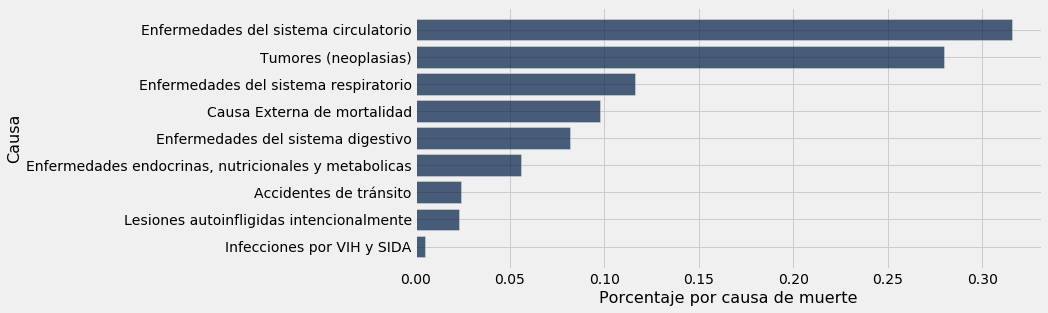

In [14]:
mortalidad_2010.select("Causa", "Porcentaje por causa de muerte").sort("Porcentaje por causa de muerte", True).barh("Causa", "Porcentaje por causa de muerte", width = 10)

El 70% de las muertes en Chile para el año 2010 (86.014) fueron ocasionadas por enfermedades del sistema circulatorio, tumores (neoplasias) y enfermedades del sistema respiratorio, siendo la de mayor incidencia las del sistema circulatorio con 31.5 % de las muertes.

Por ello se recomienda trabajar más en medidas preventivas contra estas enfermedades,

# 6. Porcentaje de muertes en relación a la población total de Chile para ese año.

In [15]:
print("El porcentaje de muertes en relacion a la poblacion total en el 2010 es de: " + "{:.2%}".format((muertes_total / total_2010)))

El porcentaje de muertes en relacion a la poblacion total en el 2010 es de: 0.50%
